## Developing Machine Learning Framework for Mitigating Anti Selection Risk for Health Insurance Underwriting

## read or process policyholder data

In [237]:
#------------------------Packages----------------------

import numpy as np
import pandas as pd
import random
import datetime
from tqdm.notebook import tqdm

#-----------------------Import Data--------------------

inpatient_claim=pd.read_csv('Inpatient_claim.csv')
bene_file=pd.read_csv('bene_file1.csv')
bene_file.drop_duplicates(['DESYNPUF_ID'],keep='last',inplace=True,ignore_index=True)

#---------------Claim Aggregation Functions------------

def no_of_claims(cust_list):
    
    claim_dict={}
    
    for cust in tqdm(cust_list,desc='no_of_claims'):
        
        claim_dict[cust]=inpatient_claim[inpatient_claim['DESYNPUF_ID']==cust]['DESYNPUF_ID'].count()
        
    return list(claim_dict.values())

def total_claimed(cust_list):
        
    claim_dict={}
    
    for cust in tqdm(cust_list,desc='total_claimed'):
        
        claim_dict[cust]=inpatient_claim[inpatient_claim['DESYNPUF_ID']==cust]['CLM_PMT_AMT'].sum()
        
    return list(claim_dict.values())

#------------Policyholder Dataframe Function-----------

def health_df(inpatient_claim=inpatient_claim,bene_file=bene_file,add_cols=[no_of_claims,total_claimed]):
    
    health_df=bene_file.copy()
    cust_list=list(health_df['DESYNPUF_ID'])
    
    for col in add_cols:
        health_df[col.__name__]=col(cust_list)
        
    health_df['claimed']=(health_df['no_of_claims']>0).astype('int')
    
    for col in health_df.columns:
        if health_df[col].isin([2,1]).min()==True:
            health_df[col].replace(2,0)
    
    return health_df

In [238]:
def get_policyholder_data(loc='policyholder_data.csv',generate=False):
    if generate==False:
        data=pd.read_csv('policyholder_data.csv')
    else:
        data=health_df()
    return data
#------------------------get data----------------------
data=get_policyholder_data(generate=True)

## data exploration and visualisation

In [239]:
import numpy as np
import pandas as pd
import random
import datetime
from tqdm.notebook import tqdm

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
#data = pd.read_csv('data_linear_regression.csv')

In [242]:
data.head()

,DESYNPUF_ID,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_COUNTY_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,...,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Total_mons,claim_amount,no_of_claims,total_claimed,claimed
0,77610BE4C99F2C74,2,1,17,330,2,2,2,2,2,...,2,2,2,2,2,48,4000.0,0,0.0,0
1,77685B3CF649A40E,1,1,10,120,2,2,2,2,2,...,2,2,2,2,2,0,2000.0,0,0.0,0
2,7785B265BC0A7936,1,1,6,500,2,2,2,2,2,...,2,2,2,2,2,0,8000.0,0,0.0,0
3,77872CACD89A9767,1,1,16,850,2,2,2,2,2,...,2,2,2,2,2,24,6000.0,0,0.0,0
4,7795D2A2AC9DCA92,2,1,3,100,2,2,2,2,2,...,2,2,2,2,2,24,9000.0,0,0.0,0


In [243]:
data.shape

(60405, 21)

In [244]:
data = data.dropna(subset=['claim_amount'])

In [245]:
data.isna().sum()

DESYNPUF_ID          0
BENE_SEX_IDENT_CD    0
BENE_RACE_CD         0
SP_STATE_CODE        0
BENE_COUNTY_CD       0
SP_ALZHDMTA          0
SP_CHF               0
SP_CHRNKIDN          0
SP_CNCR              0
SP_COPD              0
SP_DEPRESSN          0
SP_DIABETES          0
SP_ISCHMCHT          0
SP_OSTEOPRS          0
SP_RA_OA             0
SP_STRKETIA          0
Total_mons           0
claim_amount         0
no_of_claims         0
total_claimed        0
claimed              0
dtype: int64

In [246]:
data['BENE_SEX_IDENT_CD'].unique()

array([2, 1], dtype=int64)

In [247]:
for column in data.columns[1:-2]:
    print(column, data[column].unique() )

BENE_SEX_IDENT_CD [2 1]
BENE_RACE_CD [1 2 3 5]
SP_STATE_CODE [17 10  6 16  3 39 46 24 31 15  7 26 32 51  1 34  5 22 33  4 21 38 54 18
 53 36 44 37 45 13 50 30 23 52 11  2 49 19 42 12 14 41 35 25 29  9 47 43
 28 20 27  8]
BENE_COUNTY_CD [330 120 500 850 100  50 460 220 230 130 490  10 940 250 210 150 280 620
 700 310 830  60  20 590 510 560 160   0 580  90 200 140 400 180 610 820
 650 953 340 390  80 410 450  70 360 320 640 420 240 690 380 480 370 810
 260 660 190 470 290 720 910 170 570  40 411 350 270 730 520 530 550 755
 999 900 954 430 540 141 750  30 331 440 110 780 960 972 670 600 930 963
 986 800 861  55 630 961 680 622 710 740 890 840 882 770 892 980 562 888
 860 989 790 760  25 312 300 879 421 921 970 653 801 992 222 950 791 880
 771 990 841 883 462 943 982 951 381 811 851 291 948 947 795 591 974 994
 885 884 920 843 564 870 711 903 131 241 251 751 871 451 901 111 441 722
 511 194  11 552 991 461 191 975 946 831 601 561 641 702 321 521 902 978
 932 981   1 734 471 875 761 288 8

<AxesSubplot:xlabel='SP_DIABETES', ylabel='count'>

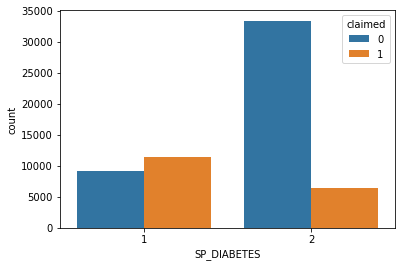

In [248]:
sns.countplot(x='SP_DIABETES',data=data,hue='claimed')

<AxesSubplot:xlabel='SP_DEPRESSN', ylabel='count'>

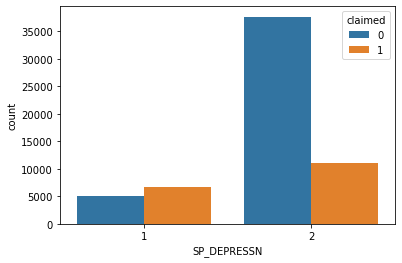

In [249]:
sns.countplot(x='SP_DEPRESSN',data=data,hue='claimed')

<AxesSubplot:xlabel='claimed', ylabel='count'>

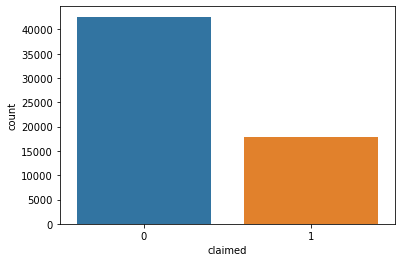

In [250]:
sns.countplot(x='claimed',data=data)

<AxesSubplot:xlabel='SP_DEPRESSN', ylabel='count'>

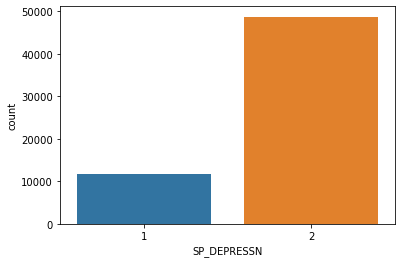

In [251]:
sns.countplot(x='SP_DEPRESSN',data=data)

<AxesSubplot:xlabel='SP_ISCHMCHT', ylabel='count'>

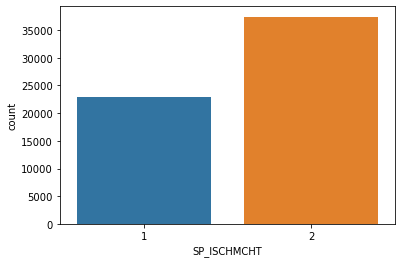

In [252]:
sns.countplot(x='SP_ISCHMCHT',data=data)

<AxesSubplot:xlabel='SP_CNCR', ylabel='count'>

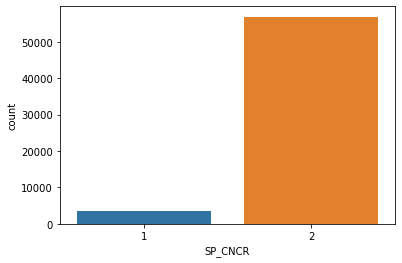

In [253]:
sns.countplot(x='SP_CNCR',data=data)

<AxesSubplot:xlabel='no_of_claims', ylabel='count'>

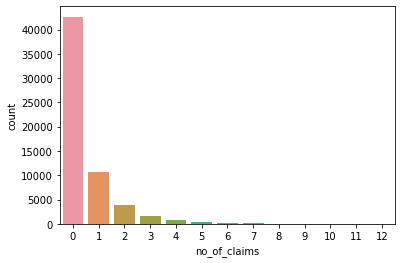

In [254]:
sns.countplot(x='no_of_claims',data=data)

<AxesSubplot:xlabel='no_of_claims', ylabel='count'>

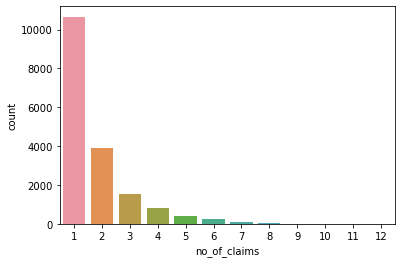

In [255]:
sns.countplot(x='no_of_claims',data=data[data['no_of_claims']!=0])

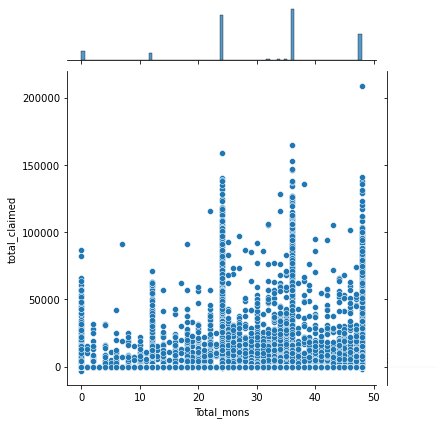

In [256]:
sns.jointplot(x='Total_mons',y='total_claimed',data=data)

Text(0.5, 1.0, 'data.corr()')

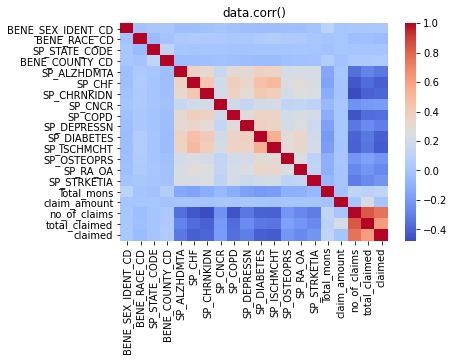

In [257]:
sns.heatmap(data.corr(),cmap='coolwarm')
plt.title('data.corr()')

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='total_claimed', ylabel='Density'>

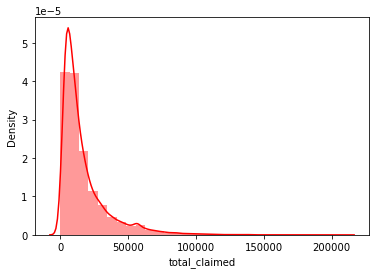

In [258]:
sns.distplot(data[data['total_claimed']>0]['total_claimed'],kde = True, color ='red', bins = 30)

In [259]:
data['total_claimed'].describe()

count     60404.000000
mean       4947.154328
std       12336.335406
min       -3000.000000
25%           0.000000
50%           0.000000
75%        4000.000000
max      209000.000000
Name: total_claimed, dtype: float64

In [260]:
data_negative=data[data['total_claimed']<0]

In [261]:
data_negative.shape

(10, 21)

In [262]:
data_negative['total_claimed'].value_counts()

-100.0     2
-300.0     2
-1000.0    1
-200.0     1
-3000.0    1
-20.0      1
-30.0      1
-2000.0    1
Name: total_claimed, dtype: int64

In [263]:
data_positive=data_negative=data[data['total_claimed']>0]

In [264]:
data_positive['total_claimed'].describe()

count     17447.000000
mean      17128.157276
std       17839.711783
min          10.000000
25%        6000.000000
50%       11000.000000
75%       21000.000000
max      209000.000000
Name: total_claimed, dtype: float64

In [265]:
data['illness_score']=data[['SP_ALZHDMTA','SP_CHF','SP_CHRNKIDN','SP_CNCR','SP_COPD','SP_DEPRESSN',
'SP_DIABETES','SP_ISCHMCHT','SP_OSTEOPRS','SP_RA_OA','SP_STRKETIA']].sum(axis=1)

In [266]:
data['illness_score']

0        22
1        22
2        22
3        22
4        22
         ..
60400    16
60401    18
60402    20
60403    20
60404    20
Name: illness_score, Length: 60404, dtype: int64

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='illness_score', ylabel='Density'>

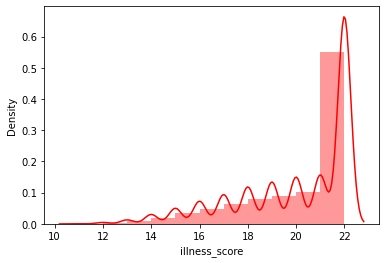

In [267]:
sns.distplot(data['illness_score'],kde = True, color ='red', bins = 11)

BENE_SEX_IDENT_CD    0.020965
BENE_RACE_CD        -0.047749
SP_STATE_CODE       -0.000584
BENE_COUNTY_CD       0.038546
SP_ALZHDMTA         -0.321612
SP_CHF              -0.410559
SP_CHRNKIDN         -0.385079
SP_CNCR             -0.191558
SP_COPD             -0.357419
SP_DEPRESSN         -0.299725
SP_DIABETES         -0.409046
SP_ISCHMCHT         -0.422895
SP_OSTEOPRS         -0.213817
SP_RA_OA            -0.258311
SP_STRKETIA         -0.221462
Total_mons           0.123308
claim_amount         0.000881
no_of_claims         0.758192
total_claimed        0.620769
claimed              1.000000
illness_score       -0.548154
Name: claimed, dtype: float64

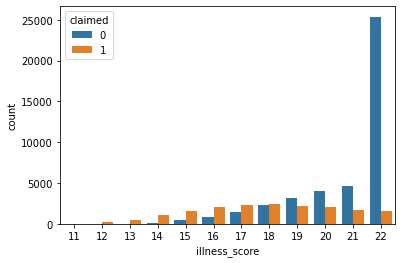

In [268]:
sns.countplot(x='illness_score',data=data,hue='claimed')
data.corr()['claimed']

Text(0.5, 1.0, 'data.corr()')

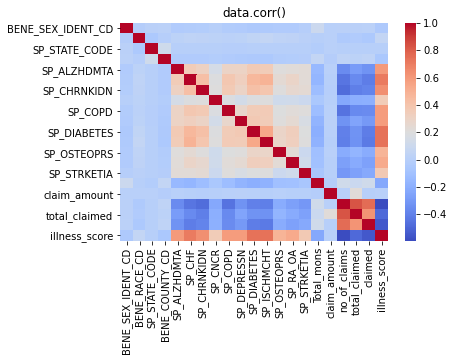

In [269]:
sns.heatmap(data.corr(),cmap='coolwarm')
plt.title('data.corr()')

<AxesSubplot:xlabel='claim_amount', ylabel='count'>

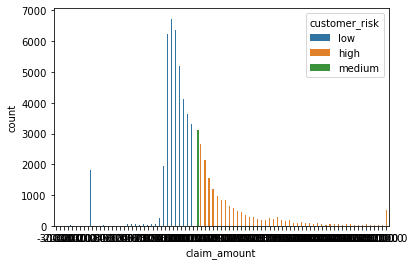

In [270]:
sns.countplot(x='claim_amount',data=df1,hue='customer_risk')

<AxesSubplot:xlabel='customer_risk', ylabel='Count'>

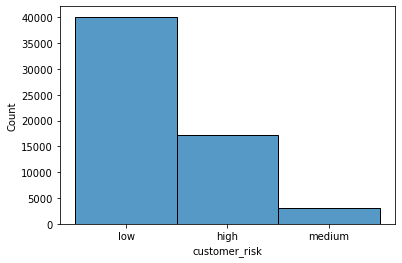

In [271]:
sns.histplot(df1.customer_risk)

In [272]:
#do sublots of all charts
#Check plotly
#check which disease has highest claims
#Add weight to ilness score

## regression models 

In [ ]:
data.info()

In [174]:
df=data

In [62]:
df.BENE_SEX_IDENT_CD.value_counts()

2    33006
1    27398
Name: BENE_SEX_IDENT_CD, dtype: int64

In [63]:
df1 = df.drop(['DESYNPUF_ID','BENE_RACE_CD','SP_STATE_CODE','BENE_COUNTY_CD'], axis=1)

In [64]:
df1

,BENE_SEX_IDENT_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Total_mons,no_of_claims,total_claimed,claimed,claim_amount,illness_score
0,2,2,2,2,2,2,2,2,2,2,2,2,48,0,0,0,4000.0,22
1,1,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,2000.0,22
2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,8000.0,22
3,1,2,2,2,2,2,2,2,2,2,2,2,24,0,0,0,6000.0,22
4,2,2,2,2,2,2,2,2,2,2,2,2,24,0,0,0,9000.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60400,2,2,1,2,2,1,2,1,1,1,1,2,24,6,46000,1,4000.0,16
60401,1,2,2,2,2,1,2,1,2,1,1,2,48,1,8000,1,8000.0,18
60402,2,2,2,2,2,2,2,1,1,2,2,2,48,0,0,0,8000.0,20
60403,1,2,2,2,2,2,2,1,1,2,2,2,24,0,0,0,8000.0,20


In [65]:
df1.columns

Index(['BENE_SEX_IDENT_CD', 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR',
       'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS',
       'SP_RA_OA', 'SP_STRKETIA', 'Total_mons', 'no_of_claims',
       'total_claimed', 'claimed', 'claim_amount', 'illness_score'],
      dtype='object')

In [66]:
def func(x):
    if x > 10339:
        return "high"
    elif x < 9355:
        return "low"
    else:
        return 'medium'

df1['customer_risk'] = df1['claim_amount'].apply(func)
df1.head(50)

,BENE_SEX_IDENT_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Total_mons,no_of_claims,total_claimed,claimed,claim_amount,illness_score,customer_risk
0,2,2,2,2,2,2,2,2,2,2,2,2,48,0,0,0,4000.0,22,low
1,1,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,2000.0,22,low
2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,8000.0,22,low
3,1,2,2,2,2,2,2,2,2,2,2,2,24,0,0,0,6000.0,22,low
4,2,2,2,2,2,2,2,2,2,2,2,2,24,0,0,0,9000.0,22,low
5,1,2,2,2,2,2,2,2,2,2,2,2,48,0,0,0,2000.0,22,low
6,1,2,2,2,2,2,2,2,2,2,2,2,36,0,0,0,43000.0,22,high
7,2,2,2,2,2,2,2,2,2,2,2,2,48,0,0,0,43000.0,22,high
8,1,2,2,2,2,2,2,2,2,2,2,2,36,0,0,0,3000.0,22,low
9,2,2,2,2,2,2,2,2,2,2,2,2,36,0,0,0,34000.0,22,high


In [47]:
df1 = df1.drop(['total_claimed','no_of_claims','illness_score'] ,axis=1)

In [48]:
varlist =  ['BENE_SEX_IDENT_CD', 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD','SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA',
       'SP_STRKETIA']

def binary_map(x):
    return x.map({ 1: 0, 2: 1})
df1[varlist] = df1[varlist].apply(binary_map)

In [50]:
#Checking the character value counts for all columns
for c in df1:
    print(df1[c].astype('category').value_counts())
    print('\n\n=======================================================\n\n')

1    33006
0    27398
Name: BENE_SEX_IDENT_CD, dtype: int64




1    49819
0    10585
Name: SP_ALZHDMTA, dtype: int64




1    44851
0    15553
Name: SP_CHF, dtype: int64




1    51694
0     8710
Name: SP_CHRNKIDN, dtype: int64




1    56873
0     3531
Name: SP_CNCR, dtype: int64




1    52959
0     7445
Name: SP_COPD, dtype: int64




1    48702
0    11702
Name: SP_DEPRESSN, dtype: int64




1    39780
0    20624
Name: SP_DIABETES, dtype: int64




1    37401
0    23003
Name: SP_ISCHMCHT, dtype: int64




1    50804
0     9600
Name: SP_OSTEOPRS, dtype: int64




1    51990
0     8414
Name: SP_RA_OA, dtype: int64




1    58009
0     2395
Name: SP_STRKETIA, dtype: int64




36    19473
24    17017
48     9883
0      3727
12     2961
34      475
35      428
32      381
30      323
46      290
18      287
22      282
33      262
42      253
20      251
44      246
14      242
26      235
28      228
16      228
2       187
40      176
10      173
31      170
6       169
27      156
29

In [51]:
#Creating dummy variables

sex = pd.get_dummies(df1['BENE_SEX_IDENT_CD'], drop_first = True, prefix='sex')
#race = pd.get_dummies(df1['BENE_RACE_CD'], drop_first = True, prefix='race')
ALZHDMTA = pd.get_dummies(df1['SP_ALZHDMTA'], drop_first = True, prefix='ALZHDMTA')
CHF = pd.get_dummies(df1['SP_CHF'], drop_first = True, prefix='CHF')
CHRNKIDN = pd.get_dummies(df1['SP_CHRNKIDN'], drop_first = True, prefix='CHRNKIDN')
CNCR = pd.get_dummies(df1['SP_CNCR'], drop_first = True, prefix='CNCR')
COPD = pd.get_dummies(df1['SP_COPD'], drop_first = True, prefix='COPD')
DEPRESSN = pd.get_dummies(df1['SP_DEPRESSN'], drop_first = True, prefix='DEPRESSN')
DIABETES = pd.get_dummies(df1['SP_DIABETES'], drop_first = True, prefix='DIABETES')
ISCHMCHT = pd.get_dummies(df1['SP_ISCHMCHT'], drop_first = True, prefix='ISCHMCHT')
OSTEOPRS = pd.get_dummies(df1['SP_OSTEOPRS'], drop_first = True, prefix='OSTEOPRS')
RA_OA = pd.get_dummies(df1['SP_RA_OA'], drop_first = True, prefix='RA_OA')
STRKETIA = pd.get_dummies(df1['SP_STRKETIA'], drop_first = True, prefix='STRKETIA')
#STATE_CODE = pd.get_dummies(df1['SP_STATE_CODE'], drop_first = True, prefix='STATE_CODE')
risk = pd.get_dummies(df1['customer_risk'], drop_first = True, prefix='customer_risk')

In [52]:
df1 = pd.concat([df1, sex,ALZHDMTA,CHF,CHRNKIDN,CNCR,COPD,DEPRESSN,DIABETES,ISCHMCHT,OSTEOPRS,RA_OA,STRKETIA,risk], axis= 1)

In [53]:
df1.drop(['BENE_SEX_IDENT_CD','SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR',
       'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS',
       'SP_RA_OA', 'SP_STRKETIA','customer_risk'], axis = 1, inplace =True)

### Train-Test Split

In [101]:
from sklearn.model_selection import train_test_split

In [137]:
# Putting feature variable to X
X = df1.drop(['claimed', 'claim_amount'], axis=1)
X.head()

,BENE_SEX_IDENT_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Total_mons,no_of_claims,total_claimed,illness_score,customer_risk
0,2,2,2,2,2,2,2,2,2,2,2,2,48,0,0,22,low
1,1,2,2,2,2,2,2,2,2,2,2,2,0,0,0,22,low
2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,0,22,low
3,1,2,2,2,2,2,2,2,2,2,2,2,24,0,0,22,low
4,2,2,2,2,2,2,2,2,2,2,2,2,24,0,0,22,low


In [138]:
y = df1['claimed']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: claimed, dtype: int64

In [139]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train[['Total_mons']] = scaler.fit_transform(X_train[['Total_mons']])

X_train.head()

## Model Building

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
logreg = LogisticRegression()

### Model 1

In [ ]:
#Adding the constant
X_train = sm.add_constant(X_train)

#Created a fitted model
logm1 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res = logm1.fit()

#Checked the summary for the model obtained
print(res.summary())

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Claimed':y_train.values, 'Claim_Prob':y_train_pred})
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Claim_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Claimed, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Claimed, y_train_pred_final.predicted))

### `79% accuracy from the train model`

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
### Step 9: Plotting the ROC Curvedef draw_roc( actual, probs ):
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Claimed, y_train_pred_final.Claim_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Claimed, y_train_pred_final.Claim_Prob)

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Claim_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Claimed, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Claim_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Claimed, y_train_pred_final.final_predicted)

### `Accuracy for train model after finding optimal cutoff point is 77.11%`

## Test set prediction

In [ ]:
X_test[['Total_mons']] = scaler.transform(X_test[['Total_mons']])

In [ ]:
X_train = X_train.drop('const', axis=1)

In [ ]:
column = X_train.columns
X_test = X_test[column]
X_test

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test)

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['Claim_ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Claim_Prob'})

In [ ]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex(['Claim ID','Claimed','Claim_Prob'], axis=1)

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Claim_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.claimed, y_pred_final.final_predicted)

### `The overall accuracy of test model is 76.74%`

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.claimed, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
y_pred_final.final_predicted.value_counts()

### From the test model we are able to find that
- `11,977` people would not claim the insurance
- `6,145` people would claim the insurance

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

In [ ]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Claim', "No Claim"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

### Model Performance

In [ ]:
X_test = X_test.drop('const', axis=1)

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

In [ ]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Claim', "No Claim"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

## Hyperparameter tuning

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

In [ ]:
score_df.nlargest(5,"mean_test_score")

In [ ]:
grid_search.best_estimator_

In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
evaluate_model(dt_best)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, dt_best.predict(X_test)))

In [ ]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
my_model = rf.fit(X_train, y_train)

In [ ]:
rf.estimators_[0]

In [ ]:
sample_tree = rf.estimators_[4]

In [ ]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=700, height=700)

In [ ]:
gph = get_dt_graph(rf.estimators_[2])
Image(gph.create_png(), width=700, height=700)

In [ ]:
evaluate_model(rf)

### Grid search for Hyperparameter tuning

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X,y)

In [ ]:
rf_best = grid_search.best_estimator_

In [ ]:
rf_best

In [ ]:
evaluate_model(rf_best)

In [ ]:
sample_tree = rf_best.estimators_[0]

In [ ]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [ ]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png(), height=600, width=600)

In [ ]:
gph = get_dt_graph(rf_best.estimators_[10])
Image(gph.create_png(), height=600, width=600)

### Variable Importance

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [ ]:
classifier_rf.fit(X_train, y_train)

In [ ]:
classifier_rf.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

- The most important variable which affects whether a patient would claim insurance or not is <b>SP_ISCHMCHT</b> and its importance is <b>0.213011</b> which means that a person having ischemic heart disease is more likely to claim insurance
- The next disease influencing claim is <b>SP_DIABETES</b> which has imp of <b>0.200258</b>

In [ ]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test,y_test_pred))

### XGBoost

In [149]:
import xgboost as xgb
from sklearn import metrics

xgclf = xgb.XGBClassifier()

xgclf.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:customer_risk

In [ ]:
from sklearn import model_selection

In [ ]:
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train, y_train)

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

In [ ]:
ytrain_predict1 = clf_xgb.predict(X_train)
ytest_predict1 = clf_xgb.predict(X_test)

In [ ]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

In [ ]:
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

In [ ]:
y_test.value_counts()

In [ ]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test,y_test_pred))

In [ ]:
# 1st-Run for best hyperparameters
parameters = {'learning_rate': [0.1, 0.2],
              'max_depth': [2, 4],
              'min_child_weight': [3, 7],
              'n_estimators': [50, 100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train, y_train)

In [ ]:
# print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

In [ ]:
final_model = xgb.XGBClassifier(learning_rate=0.3,
                                max_depth=6,
                                min_child_weight=1,
                                n_estimators=100)

final_model.fit(X_train, y_train)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=final_model.predict_proba(X_train)[:, 1]))

#print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test_res,
        #                                                     y_score=final_model.predict_proba(X_test_res)[:, 1]))

## Linear Regression

In [175]:
df.head()

,DESYNPUF_ID,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_COUNTY_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,...,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Total_mons,no_of_claims,total_claimed,claimed,claim_amount,illness_score
0,77610BE4C99F2C74,2,1,17,330,2,2,2,2,2,...,2,2,2,2,48,0,0,0,4000.0,22
1,77685B3CF649A40E,1,1,10,120,2,2,2,2,2,...,2,2,2,2,0,0,0,0,2000.0,22
2,7785B265BC0A7936,1,1,6,500,2,2,2,2,2,...,2,2,2,2,0,0,0,0,8000.0,22
3,77872CACD89A9767,1,1,16,850,2,2,2,2,2,...,2,2,2,2,24,0,0,0,6000.0,22
4,7795D2A2AC9DCA92,2,1,3,100,2,2,2,2,2,...,2,2,2,2,24,0,0,0,9000.0,22


In [176]:
df.columns

Index(['DESYNPUF_ID', 'BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'SP_STATE_CODE',
       'BENE_COUNTY_CD', 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR',
       'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS',
       'SP_RA_OA', 'SP_STRKETIA', 'Total_mons', 'no_of_claims',
       'total_claimed', 'claimed', 'claim_amount', 'illness_score'],
      dtype='object')

In [177]:
#Creating dummy variables

sex = pd.get_dummies(df['BENE_SEX_IDENT_CD'], drop_first = True, prefix='sex')
race = pd.get_dummies(df['BENE_RACE_CD'], drop_first = True, prefix='race')
ALZHDMTA = pd.get_dummies(df['SP_ALZHDMTA'], drop_first = True, prefix='ALZHDMTA')
CHF = pd.get_dummies(df['SP_CHF'], drop_first = True, prefix='CHF')
CHRNKIDN = pd.get_dummies(df['SP_CHRNKIDN'], drop_first = True, prefix='CHRNKIDN')
CNCR = pd.get_dummies(df['SP_CNCR'], drop_first = True, prefix='CNCR')
COPD = pd.get_dummies(df['SP_COPD'], drop_first = True, prefix='COPD')
DEPRESSN = pd.get_dummies(df['SP_DEPRESSN'], drop_first = True, prefix='DEPRESSN')
DIABETES = pd.get_dummies(df['SP_DIABETES'], drop_first = True, prefix='DIABETES')
ISCHMCHT = pd.get_dummies(df['SP_ISCHMCHT'], drop_first = True, prefix='ISCHMCHT')
OSTEOPRS = pd.get_dummies(df['SP_OSTEOPRS'], drop_first = True, prefix='OSTEOPRS')
RA_OA = pd.get_dummies(df['SP_RA_OA'], drop_first = True, prefix='RA_OA')
STRKETIA = pd.get_dummies(df['SP_STRKETIA'], drop_first = True, prefix='STRKETIA')
STATE_CODE = pd.get_dummies(df['SP_STATE_CODE'], drop_first = True, prefix='STATE_CODE')

In [178]:
df = pd.concat([df, sex, race,ALZHDMTA,CHF,CHRNKIDN,CNCR,COPD,DEPRESSN,DIABETES,ISCHMCHT,OSTEOPRS,RA_OA,STRKETIA,STATE_CODE], axis= 1)

In [179]:
df.columns

Index(['DESYNPUF_ID', 'BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'SP_STATE_CODE',
       'BENE_COUNTY_CD', 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR',
       'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS',
       'SP_RA_OA', 'SP_STRKETIA', 'Total_mons', 'no_of_claims',
       'total_claimed', 'claimed', 'claim_amount', 'illness_score', 'sex_2',
       'race_2', 'race_3', 'race_5', 'ALZHDMTA_2', 'CHF_2', 'CHRNKIDN_2',
       'CNCR_2', 'COPD_2', 'DEPRESSN_2', 'DIABETES_2', 'ISCHMCHT_2',
       'OSTEOPRS_2', 'RA_OA_2', 'STRKETIA_2', 'STATE_CODE_2', 'STATE_CODE_3',
       'STATE_CODE_4', 'STATE_CODE_5', 'STATE_CODE_6', 'STATE_CODE_7',
       'STATE_CODE_8', 'STATE_CODE_9', 'STATE_CODE_10', 'STATE_CODE_11',
       'STATE_CODE_12', 'STATE_CODE_13', 'STATE_CODE_14', 'STATE_CODE_15',
       'STATE_CODE_16', 'STATE_CODE_17', 'STATE_CODE_18', 'STATE_CODE_19',
       'STATE_CODE_20', 'STATE_CODE_21', 'STATE_CODE_22', 'STATE_CODE_23',
       'STATE_CODE_24', 'STATE_CODE_25'

In [180]:
df.drop(['BENE_SEX_IDENT_CD','BENE_RACE_CD','SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR',
       'SP_COPD', 'claim_amount', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS',
       'SP_RA_OA', 'SP_STRKETIA','BENE_COUNTY_CD','claimed','SP_STATE_CODE'], axis = 1, inplace =True)

In [181]:
#Split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state =100)

In [182]:
df_train.drop(['DESYNPUF_ID'], axis = 1, inplace =True)
df_test.drop(['DESYNPUF_ID'], axis = 1, inplace =True)

In [183]:
print(df_test.shape)
print(df_train.shape)

(18122, 70)
(42282, 70)


In [184]:
scaler = StandardScaler()

In [185]:
df_train.head()

,Total_mons,no_of_claims,total_claimed,illness_score,sex_2,race_2,race_3,race_5,ALZHDMTA_2,CHF_2,...,STATE_CODE_44,STATE_CODE_45,STATE_CODE_46,STATE_CODE_47,STATE_CODE_49,STATE_CODE_50,STATE_CODE_51,STATE_CODE_52,STATE_CODE_53,STATE_CODE_54
27060,24,0,0,19,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1372,12,0,0,22,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
53819,25,0,0,22,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
46247,24,0,0,19,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
16588,36,0,0,15,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
num_vars = ['no_of_claims','total_claimed','illness_score', 'Total_mons']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [187]:
# Divide in X and Y sets for the model building

y_train = df_train.pop('total_claimed')
X_train1 = df_train

In [188]:
#X_train.reset_index(drop=True, inplace=True)
#y_train.reset_index(drop=True, inplace=True)

In [189]:
X_train1.head()

,Total_mons,no_of_claims,illness_score,sex_2,race_2,race_3,race_5,ALZHDMTA_2,CHF_2,CHRNKIDN_2,...,STATE_CODE_44,STATE_CODE_45,STATE_CODE_46,STATE_CODE_47,STATE_CODE_49,STATE_CODE_50,STATE_CODE_51,STATE_CODE_52,STATE_CODE_53,STATE_CODE_54
27060,-0.475911,-0.488758,-0.409883,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1372,-1.405689,-0.488758,0.829734,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
53819,-0.398430,-0.488758,0.829734,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
46247,-0.475911,-0.488758,-0.409883,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
16588,0.453866,-0.488758,-2.062706,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
# Running RFE with the output number of the variable equal to 15
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train1, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train1, y_train)

In [191]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train1.columns,rfe.support_,rfe.ranking_))

[('Total_mons', False, 23),
 ('no_of_claims', True, 1),
 ('illness_score', True, 1),
 ('sex_2', False, 26),
 ('race_2', False, 22),
 ('race_3', True, 1),
 ('race_5', False, 36),
 ('ALZHDMTA_2', True, 1),
 ('CHF_2', True, 1),
 ('CHRNKIDN_2', True, 1),
 ('CNCR_2', True, 1),
 ('COPD_2', True, 1),
 ('DEPRESSN_2', True, 1),
 ('DIABETES_2', True, 1),
 ('ISCHMCHT_2', True, 1),
 ('OSTEOPRS_2', True, 1),
 ('RA_OA_2', True, 1),
 ('STRKETIA_2', True, 1),
 ('STATE_CODE_2', True, 1),
 ('STATE_CODE_3', False, 17),
 ('STATE_CODE_4', True, 1),
 ('STATE_CODE_5', False, 25),
 ('STATE_CODE_6', False, 32),
 ('STATE_CODE_7', False, 27),
 ('STATE_CODE_8', True, 1),
 ('STATE_CODE_9', False, 30),
 ('STATE_CODE_10', True, 1),
 ('STATE_CODE_11', False, 28),
 ('STATE_CODE_12', True, 1),
 ('STATE_CODE_13', True, 1),
 ('STATE_CODE_14', False, 16),
 ('STATE_CODE_15', False, 24),
 ('STATE_CODE_16', False, 7),
 ('STATE_CODE_17', False, 21),
 ('STATE_CODE_18', False, 14),
 ('STATE_CODE_19', True, 1),
 ('STATE_CODE_20'

In [192]:
# storing the selected 15 variables in col list
col = X_train1.columns[rfe.support_]
col

Index(['no_of_claims', 'illness_score', 'race_3', 'ALZHDMTA_2', 'CHF_2',
       'CHRNKIDN_2', 'CNCR_2', 'COPD_2', 'DEPRESSN_2', 'DIABETES_2',
       'ISCHMCHT_2', 'OSTEOPRS_2', 'RA_OA_2', 'STRKETIA_2', 'STATE_CODE_2',
       'STATE_CODE_4', 'STATE_CODE_8', 'STATE_CODE_10', 'STATE_CODE_12',
       'STATE_CODE_13', 'STATE_CODE_19', 'STATE_CODE_20', 'STATE_CODE_22',
       'STATE_CODE_28', 'STATE_CODE_30', 'STATE_CODE_31', 'STATE_CODE_37',
       'STATE_CODE_42', 'STATE_CODE_43', 'STATE_CODE_44', 'STATE_CODE_47',
       'STATE_CODE_49', 'STATE_CODE_53', 'STATE_CODE_54'],
      dtype='object')

In [193]:
# checking which columns have been eleminated 
X_train1.columns[~rfe.support_]

Index(['Total_mons', 'sex_2', 'race_2', 'race_5', 'STATE_CODE_3',
       'STATE_CODE_5', 'STATE_CODE_6', 'STATE_CODE_7', 'STATE_CODE_9',
       'STATE_CODE_11', 'STATE_CODE_14', 'STATE_CODE_15', 'STATE_CODE_16',
       'STATE_CODE_17', 'STATE_CODE_18', 'STATE_CODE_21', 'STATE_CODE_23',
       'STATE_CODE_24', 'STATE_CODE_25', 'STATE_CODE_26', 'STATE_CODE_27',
       'STATE_CODE_29', 'STATE_CODE_32', 'STATE_CODE_33', 'STATE_CODE_34',
       'STATE_CODE_35', 'STATE_CODE_36', 'STATE_CODE_38', 'STATE_CODE_39',
       'STATE_CODE_41', 'STATE_CODE_45', 'STATE_CODE_46', 'STATE_CODE_50',
       'STATE_CODE_51', 'STATE_CODE_52'],
      dtype='object')

In [194]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train1[col]

In [195]:
X_train_rfe.shape

(42282, 34)

### Model 1

In [196]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,STRKETIA_2,24.56
6,CNCR_2,16.01
7,COPD_2,10.88
5,CHRNKIDN_2,10.36
12,RA_OA_2,8.48
3,ALZHDMTA_2,7.78
11,OSTEOPRS_2,7.25
4,CHF_2,6.90
8,DEPRESSN_2,6.86
9,DIABETES_2,5.79


In [197]:
# Adding a constant variable

X_train_sm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

# Print a summary of the linear regression model obtained
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:          total_claimed   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     3015.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:02:05   Log-Likelihood:                -34407.
No. Observations:               42282   AIC:                         6.888e+04
Df Residuals:                   42248   BIC:                         6.918e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0028      0.002      1.734

### Model 2

In [198]:
X_train_new = X_train_rfe.drop(['STATE_CODE_12','illness_score','STATE_CODE_53','STATE_CODE_8'], axis = 1)

In [199]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,STRKETIA_2,18.63
5,CNCR_2,14.62
6,COPD_2,10.87
4,CHRNKIDN_2,10.29
11,RA_OA_2,8.45
2,ALZHDMTA_2,7.51
10,OSTEOPRS_2,7.15
7,DEPRESSN_2,6.63
3,CHF_2,6.36
8,DIABETES_2,5.02


In [200]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())


                            OLS Regression Results                            
Dep. Variable:          total_claimed   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     3316.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:02:09   Log-Likelihood:                -34408.
No. Observations:               42282   AIC:                         6.888e+04
Df Residuals:                   42251   BIC:                         6.915e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0239      0.020      1.186

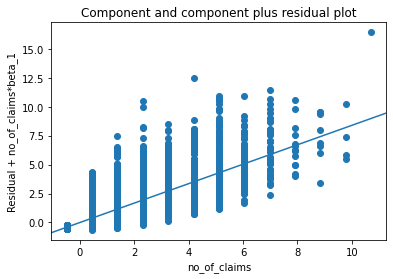

In [201]:
sm.graphics.plot_ccpr(lr2, 'no_of_claims')
plt.show()

In [202]:
y_train_pred = lr2.predict(X_train_lm2)

In [203]:
y_train_pred

27060   -0.407555
1372    -0.343797
53819   -0.401072
46247   -0.417825
16588   -0.448041
           ...   
12119   -0.442120
57192   -0.401072
14148   -0.413760
56089   -0.401072
38409    0.357299
Length: 42282, dtype: float64

In [204]:
res = y_train - y_train_pred

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Errors')

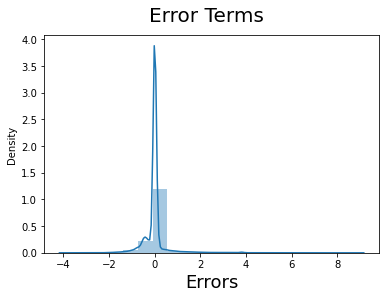

In [205]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)    

#### Test

In [206]:
#Test
num_vars = ['no_of_claims','total_claimed','Total_mons','illness_score']

df_test[num_vars] = scaler.transform(df_test[num_vars])

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



In [207]:
df_test.head()

,Total_mons,no_of_claims,total_claimed,illness_score,sex_2,race_2,race_3,race_5,ALZHDMTA_2,CHF_2,...,STATE_CODE_44,STATE_CODE_45,STATE_CODE_46,STATE_CODE_47,STATE_CODE_49,STATE_CODE_50,STATE_CODE_51,STATE_CODE_52,STATE_CODE_53,STATE_CODE_54
59521,6.614613,0.444187,0.002489,-0.863319,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15693,1.656145,-0.488758,-0.400862,-0.708356,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26068,-6.607968,-0.488758,-0.400862,-0.630874,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
10324,11.573081,-0.488758,-0.400862,-0.940800,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
41276,6.614613,-0.488758,-0.400862,-0.785837,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [208]:
y_test = df_test.pop('total_claimed')
X_test1 = df_test

In [211]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test2=X_test1[col1]

# Adding constant variable to test dataframe
X_test_lm2 = sm.add_constant(X_test2)
X_test_lm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18122 entries, 59521 to 34905
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          18122 non-null  float64
 1   no_of_claims   18122 non-null  float64
 2   race_3         18122 non-null  uint8  
 3   ALZHDMTA_2     18122 non-null  uint8  
 4   CHF_2          18122 non-null  uint8  
 5   CHRNKIDN_2     18122 non-null  uint8  
 6   CNCR_2         18122 non-null  uint8  
 7   COPD_2         18122 non-null  uint8  
 8   DEPRESSN_2     18122 non-null  uint8  
 9   DIABETES_2     18122 non-null  uint8  
 10  ISCHMCHT_2     18122 non-null  uint8  
 11  OSTEOPRS_2     18122 non-null  uint8  
 12  RA_OA_2        18122 non-null  uint8  
 13  STRKETIA_2     18122 non-null  uint8  
 14  STATE_CODE_2   18122 non-null  uint8  
 15  STATE_CODE_4   18122 non-null  uint8  
 16  STATE_CODE_10  18122 non-null  uint8  
 17  STATE_CODE_13  18122 non-null  uint8  
 18  ST

In [212]:
# Making predictions using the final model (lr6)
y_test_pred = lr2.predict(X_test_lm2)

Text(0, 0.5, 'y_test_pred')

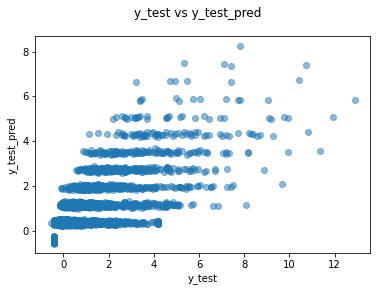

In [213]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred,alpha = 0.5)
fig.suptitle('y_test vs y_test_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_test_pred') 

In [214]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)
r2 = round(r2_score(y_test, y_test_pred),4)
r2

0.6843

In [215]:
# n is number of rows in X

n = X_test2.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.6840035517012815

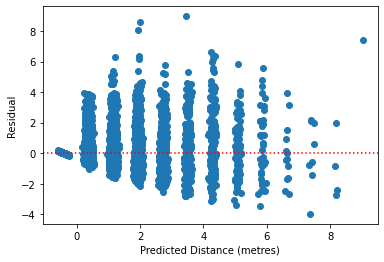

In [216]:
plt.scatter( y_train_pred , res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel("Residual")
plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


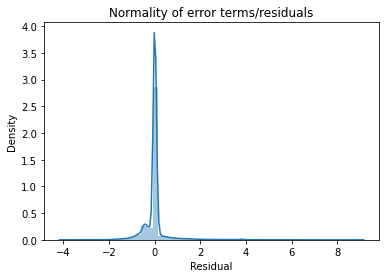

In [217]:
# Distribution of errors
p = sns.distplot(res,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

## XGBoost

In [218]:
import xgboost as xgb1
from sklearn import metrics

In [219]:
xgb_r = xgb1.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [220]:
xgb_r.fit(X_train1,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [223]:
from sklearn.metrics import explained_variance_score

In [225]:
predictions1 = xgb_r.predict(X_train1)
print(explained_variance_score(predictions1,y_train))

0.6980237699463634


In [224]:
predictions = xgb_r.predict(X_test1)
print(explained_variance_score(predictions,y_test))

0.5056320786194228


## SHAP

In [143]:
#pip install shap

In [144]:
import shap
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

#from sklearn_pandas import DataFrameMapper

from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error

In [145]:
shap.initjs()

In [146]:
X_test.shape

(18122, 17)

In [147]:
row_to_show = 6
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

NameError: name 'my_model' is not defined

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

## LIME

In [ ]:
#pip install lime

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['MEDV'], verbose=True, mode='regression')

In [ ]:
X_train.shape

In [ ]:
# Choose the 5th instance and use it to predict the results
j = 7
exp = explainer.explain_instance(X_test.values[j], my_model.predict, num_features=6)
# Show the predictions
exp.show_in_notebook(show_table=True)